# Playground for Pandas.plot() on Vega Airports dataset

### 1️⃣ Imports and loading DS

In [83]:
print("My functions import --> ")

from Classes.Py.DotDict import DotDict
from Classes.Py.SuppressStdOut import SuppressStdout

from Functions.General_Func import print_X, delete_variables
from Functions.Airports_Helpers import get_wiki_airports, get_wiki_airports_US

print("\t\t\t...Done")

My functions import --> 
			...Done


In [84]:
print_X("General Imports")

import gc
import pandas as pd
import numpy as np
from dtale import show as dt_show
from matplotlib import pyplot as plt

from seaborn import heatmap
import plotly.graph_objects as go

print("...Done")

======================= General Imports =======================
...Done


#### 1️⃣-1 EDA -- Loading + First Look at the data: num of Flights by Year / Month

In [85]:
# df_flights = pd.read_csv('https://raw.githubusercontent.com/vega/vega-datasets/main/data/flights-3m.csv')

df_flights = (
    pd.read_pickle('./Data/vega_datasets.pkl')
        .loc['flights-3m.csv']['DF']
        .assign(
            origin=lambda x: x['origin'].astype('category'),
            destination=lambda x: x['destination'].astype('category')
        )
)

😏 By converting from txt to Cat dtype, 8.8Mb --> 5.7Mb == 46% of the DF weight was saved

In [86]:
# from math import ceil
print_X("Initially loaded")
df_flights[:3]

====================== Initially loaded ======================


,date,delay,distance,origin,destination
0,1010001,14,405,MCI,MDW
1,1010530,-11,370,LAX,PHX
2,1010540,5,389,ONT,SMF


In [87]:
print_X("Converted date")
df_flights['date'] =  pd.to_datetime(df_flights['date'], unit="m")
df_flights[:3]

======================= Converted date =======================


,date,delay,distance,origin,destination
0,1971-12-03 09:21:00,14,405,MCI,MDW
1,1971-12-03 18:10:00,-11,370,LAX,PHX
2,1971-12-03 18:20:00,5,389,ONT,SMF


In [88]:
print_X("Info")
df_flights.info()

============================ Info ============================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231083 entries, 0 to 231082
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   date         231083 non-null  datetime64[ns]
 1   delay        231083 non-null  int64         
 2   distance     231083 non-null  int64         
 3   origin       231083 non-null  category      
 4   destination  231083 non-null  category      
dtypes: category(2), datetime64[ns](1), int64(2)
memory usage: 5.7 MB


In [89]:
print_X("Descr")
df_flights.describe(include='all', datetime_is_numeric=True)

============================ Descr ============================


,date,delay,distance,origin,destination
count,231083,231083.000000,231083.000000,231083,231083
unique,NaN,NaN,NaN,59,59
top,NaN,NaN,NaN,PHX,PHX
freq,NaN,NaN,NaN,15186,15144
mean,1974-02-09 14:11:09.424405952,8.014523,506.802508,NaN,NaN
min,1971-12-03 09:21:00,-58.000000,108.000000,NaN,NaN
25%,1972-05-05 08:25:00,-5.000000,283.000000,NaN,NaN
50%,1974-02-02 15:10:00,0.000000,370.000000,NaN,NaN
75%,1975-11-17 22:40:00,12.000000,611.000000,NaN,NaN
max,1976-04-19 04:17:00,509.000000,2298.000000,NaN,NaN


#### 1️⃣-2 Fligts by Years preview

In [90]:
print_X("Num of flights by Year/Month: Multiindex Pivot")

(
    df_flights
    .groupby([
        df_flights['date'].dt.year.astype(int), 
        df_flights['date'].dt.month.astype(int)
        ])
    .size()
    .sort_index(ascending=True)
 )

======= Num of flights by Year/Month: Multiindex Pivot =======


date  date
1971  12      11021
1972  1       11717
      2        9983
      3       13238
      4        9914
      5       10790
      6       12548
1973  10       2706
      11       9939
      12      12811
1974  1       10408
      2        9949
      3       13538
      4        9878
      5        2589
1975  9        5410
      10       9839
      11      10196
      12      13311
1976  1       10052
      2       12176
      3       11491
      4        7579
dtype: int64

==================== Flights by Year-Month ====================


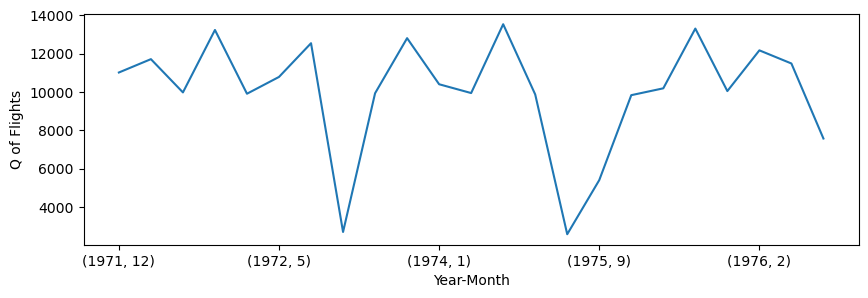

In [91]:
print_X("Flights by Year-Month")

(
    df_flights.groupby([df_flights['date'].dt.year, df_flights['date'].dt.month])
        .size()
        .plot(kind='line', figsize=(10,3))
)

plt.xlabel('Year-Month')
plt.ylabel('Q of Flights')

plt.show()

In [92]:
print_X("Flights by Year-Month, Matrix")

YM_Matrix = (
    df_flights.groupby([df_flights['date'].dt.year, df_flights['date'].dt.month])
        .size()
        .unstack()
        .rename_axis(columns='months', index='years')
        .sort_index(ascending=False)        
)

(
    YM_Matrix
    .applymap(lambda x: f"{x:,.0f}" if pd.notna(x) else x)
    # .applymap(lambda x: f"{int(x/1000)}K" if pd.notna(x) else x)
    .fillna("--")
)

================ Flights by Year-Month, Matrix ================


months,1,2,3,4,5,6,9,10,11,12
years,,,,,,,,,,
1976,"10,052","12,176","11,491","7,579",--,--,--,--,--,--
1975,--,--,--,--,--,--,"5,410","9,839","10,196","13,311"
1974,"10,408","9,949","13,538","9,878","2,589",--,--,--,--,--
1973,--,--,--,--,--,--,--,"2,706","9,939","12,811"
1972,"11,717","9,983","13,238","9,914","10,790","12,548",--,--,--,--
1971,--,--,--,--,--,--,--,--,--,"11,021"


🚩 NaN periods are obvious data inconsistency

#### Vizualisiing as a Heatmap

======================= Seaborn Heatmap =======================


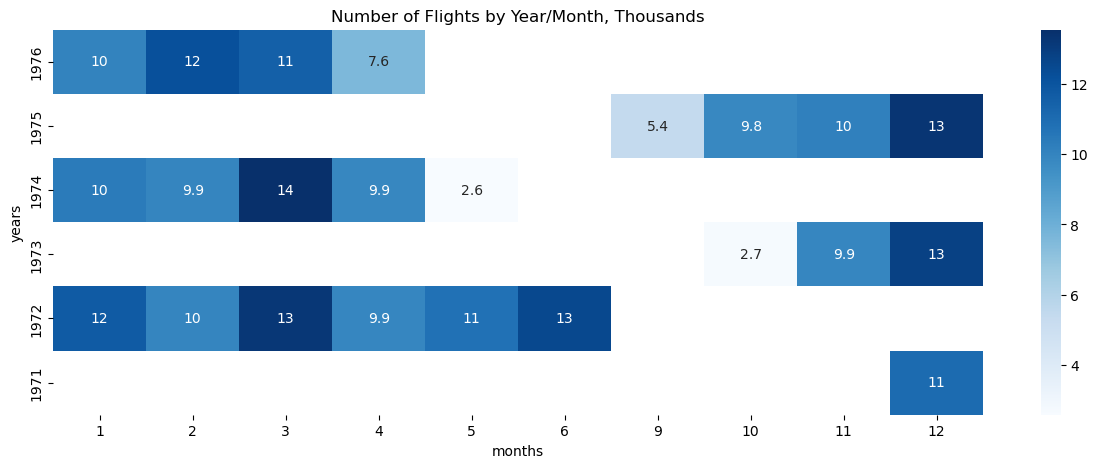

In [93]:
print_X("Seaborn Heatmap")

fig, ax = plt.subplots(figsize=(15, 5))
heatmap(
    (
    YM_Matrix
        .sort_index(ascending=False)
        .applymap(lambda x: x/1000 if pd.notna(x) else x)) # SR for annotations
            , cmap='Blues'
            , annot=True
)

plt.title("Number of Flights by Year/Month, Thousands")
plt.show()

To add interactivity, same chart is recreated below using Plotly 

In [94]:
print_X("Plotly Heatmap")
import plotly.graph_objects as go

# Create the heatmap figure
fig = go.Figure(go.Heatmap(
    x=YM_Matrix.columns, 
    y=YM_Matrix.index, 
    z=YM_Matrix.values,
    colorscale='Blues'
)).update_layout(
        title='Number of Flights by Year/Month',
        xaxis_title='Months',
        yaxis_title='Years',
        width=1000,  # pxls
        height=500
)

fig.show()

======================= Plotly Heatmap =======================


In [95]:
delete_variables('YM_Matrix|ax|z|fig'.split('|'))

>>> Variable 'YM_Matrix'..................... deleted from locals().
>>> Variable 'ax'............................ deleted from locals().
>>> Variable 'z'............................. does not exist.
>>> Variable 'fig'........................... deleted from locals().


## 2️⃣ Mapping Airports to Wiki data to fetch Country

to scrape data from Wiki, BS4-based functions were created:
* get_wiki_airports()
* get_wiki_airports_en()

(both of the functions are Chat GPT created from tag-based tasks, set by me)

In [96]:
wiki_airports = get_wiki_airports().set_index('IATA Code')
print_X("Data from Wikipedia retrieved")

================ Data from Wikipedia retrieved ================


In [97]:
print_X("Sample from Wikipedia")
wiki_airports.loc['KBP']

==================== Sample from Wikipedia ====================


Continent    Eastern Europe
Country             Ukraine
Location               Kyiv
Name: KBP, dtype: object

In [98]:
print_X("Airports_DF Countries:")

print(
    pd.DataFrame(
        df_flights['destination'].unique(), 
        columns=['IATA Code']
            ).set_index('IATA Code')

            .merge(wiki_airports, left_index=True, right_index=True)['Country']
            .unique()
)

print("--> So we have only US airports in the dataset...")

=================== Airports_DF Countries: ===================
['United States']
--> So we have only US airports in the dataset...


#### 2️⃣-1️ Mapping Airports to States (identifying hottest States / Airports by States)

In [99]:
wiki_airports_us = get_wiki_airports_US().set_index('IATA')

In [100]:
wiki_airports_us[:3]

,City,State
IATA,,
BHM,Birmingham,ALABAMA
DHN,Dothan,ALABAMA
HSV,Huntsville,ALABAMA


In [101]:
df_flights['destination'].value_counts()[:10]

PHX    15144
LAS    14409
HOU    12430
DAL    11078
BWI    10683
MDW    10159
LAX    10134
OAK     9920
BNA     7678
STL     7045
Name: destination, dtype: int64

In [102]:
flights_by_airports_states = (
     pd.concat(
        [
            df_flights['destination'].value_counts(), 
            wiki_airports_us['State']
        ], axis=1)
        
        .replace({0:None})
        .dropna()
        
)

flights_by_states = flights_by_airports_states.groupby('State').sum()

flights_by_states.sort_values('destination', ascending=False).head(3)

,destination
State,
CALIFORNIA,49424.0
TEXAS,40207.0
NEVADA,17908.0


=====================  Hottest US States =====================


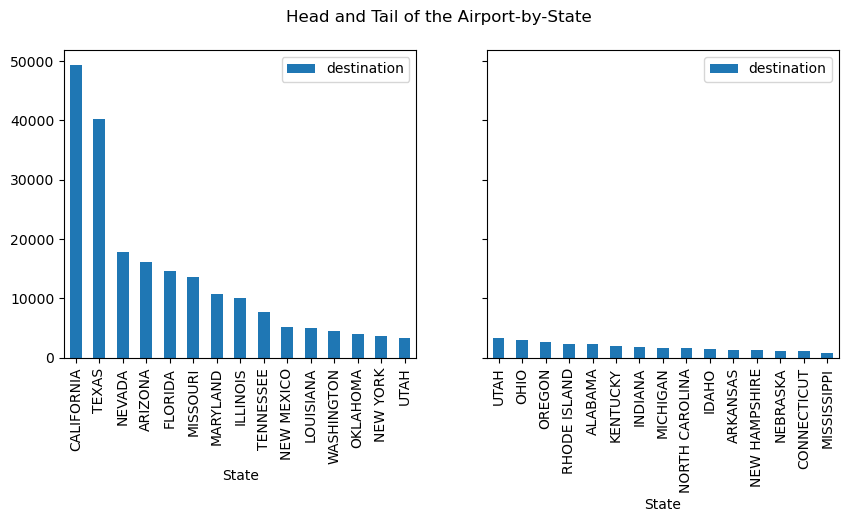

In [103]:
print_X(" Hottest US States")

fig, ax = plt.subplots(1,2, sharey=True, figsize=(10,4))

flights_by_states.nlargest(columns=['destination'], n=15).plot(kind='bar', ax=ax[0])
flights_by_states.nsmallest(columns=['destination'], n=15).sort_values(by='destination', ascending=False).plot(kind='bar', ax=ax[1])

fig.suptitle("Head and Tail of the Airport-by-State")
plt.show()

In [54]:
flights_by_airports_states[:3]

,destination,State
PHX,15144.0,ARIZONA
LAS,14409.0,NEVADA
HOU,12430.0,TEXAS


In [104]:
n = 22

print_X(f"Hottest [{n}] Airports by destination")
(
    flights_by_airports_states
    # getting SumByState from flights_by_states. For this we need common index
        .reset_index()
        .set_index('State')
        .assign(SumByState = flights_by_states['destination'])
        .rename(columns={'destination':'SumByAirport', 'index':'Airport'})
    # setting indexes + sorting for pivoting and presenting
        .reset_index()
        .set_index(['State','Airport'])
        .sort_values(by=['SumByState'], ascending=[False])

)[:n]

============ Hottest [22] Airports by destination ============


SumByAirport  SumByState
State      Airport                          
CALIFORNIA SAN            6812.0     49424.0
           OAK            9920.0     49424.0
           ONT            4921.0     49424.0
           SNA            1224.0     49424.0
           SMF            5260.0     49424.0
           SJC            6037.0     49424.0
           BUR            4316.0     49424.0
           LAX           10134.0     49424.0
           SFO             800.0     49424.0
TEXAS      AMA             873.0     40207.0
           HRL            1029.0     40207.0
           AUS            3953.0     40207.0
           ELP            3402.0     40207.0
           CRP             637.0     40207.0
           MAF            1199.0     40207.0
           DAL           11078.0     40207.0
           HOU           12430.0     40207.0
           LBB            1232.0     40207.0
           SAT            3826.0     40207.0
           IAH             548.0     40207.0
NEVADA     RNO            3499.0     17908.0
           LAS           14409.0     17908.0

### 2. EDA -- Flights from and to Airports (all arived planes, departured)

In [105]:
# %%timeit
# Group by origin and destination, count rows, and merge the results
print_X("Origin_Count and Destination_Count over same Index/Airport")

airports_count = (
    pd.concat(
        [
            df_flights['origin'].value_counts(),
            df_flights['destination'].value_counts()
        ],axis=1, sort=True)
            
            .fillna(0)
            .assign(diff = lambda x: x['origin'] - x['destination'])
            .sort_values(by='diff', ascending=False)
)

airports_count.query("origin != destination")[:10]

= Origin_Count and Destination_Count over same Index/Airport =


,origin,destination,diff
PHX,15186,15144,42
HOU,12453,12430,23
DAL,11090,11078,12
SMF,5271,5260,11
MDW,10167,10159,8
CLE,1851,1844,7
MSY,5056,5049,7
SLC,3377,3372,5
PBI,905,901,4
CRP,641,637,4


In theory Origin_Count should be == Destination_Count. <br>
    &nbsp; Aircraft arives and departures from the same Airport. <br>
    &nbsp; Firstly this Airport is Destination, later, the same Airport is Origin for the same aircraft. 
    
    🚩 In the real project it would be important to address the issue of "lost plains" separately, investigating correlation to blank periods / gaps in data.

In [106]:
delete_variables('ax, fig, wiki_airports, flights_by_airports_states, flights_by_states, airports_count'.replace(" ","").split(","))


>>> Variable 'ax'............................ deleted from locals().
>>> Variable 'fig'........................... deleted from locals().
>>> Variable 'wiki_airports'................. deleted from locals().
>>> Variable 'flights_by_airports_states'.... deleted from locals().
>>> Variable 'flights_by_states'............. deleted from locals().
>>> Variable 'airports_count'................ deleted from locals().


## 3️⃣ EDA -- Flights dynamics (based on Destination) by Years. 
Trend of flights / Airports over Years

In [107]:
df_flights_by_airport_year = (

    df_flights
        .groupby([df_flights['destination'], df_flights['date'].dt.year], as_index=False)
        .size()
            
            # calc num of flights by destination and year + total flights by destination
            .set_index('destination')
            .rename(columns={'size': 'num_flights'})
            .assign(total_flights=
                df_flights.groupby(df_flights['destination']).size()
                        )
            
            # adding multiindex to df
            .reset_index()
            .set_index(['destination', 'date'])
            .sort_values('total_flights', ascending=False)
            # .sort_index()
)

df_flights_by_airport_year[:7]

num_flights  total_flights
destination date                            
PHX         1973         1682          15144
            1971          743          15144
            1975         2533          15144
            1976         2707          15144
            1972         4467          15144
            1974         3012          15144
LAS         1972         4247          14409

In [113]:
n = 10

df_flights_by_destination = (
    df_flights_by_airport_year['total_flights']
        .reset_index(drop=True, level=1)
        .groupby('destination')
        .min()
        .sort_values(ascending=False)
)
list_N_lagrest_airports = (
        df_flights_by_destination
        .head(n)
        .index.tolist()
)

list_N_smallest_airports = (
    df_flights_by_destination
    .tail(n)
    .index.tolist()
)

print_X(f"[{n}] lagrest airports:")
print(f"{list_N_lagrest_airports}"+"\n")
print_X(f"[{n}] smallest airports:")
print(f"{list_N_smallest_airports}")

=================== [10] lagrest airports: ===================
['PHX', 'LAS', 'HOU', 'DAL', 'BWI', 'MDW', 'LAX', 'OAK', 'BNA', 'STL']

=================== [10] smallest airports: ===================
['TUS', 'HRL', 'PBI', 'BUF', 'AMA', 'ALB', 'SFO', 'JAN', 'CRP', 'IAH']


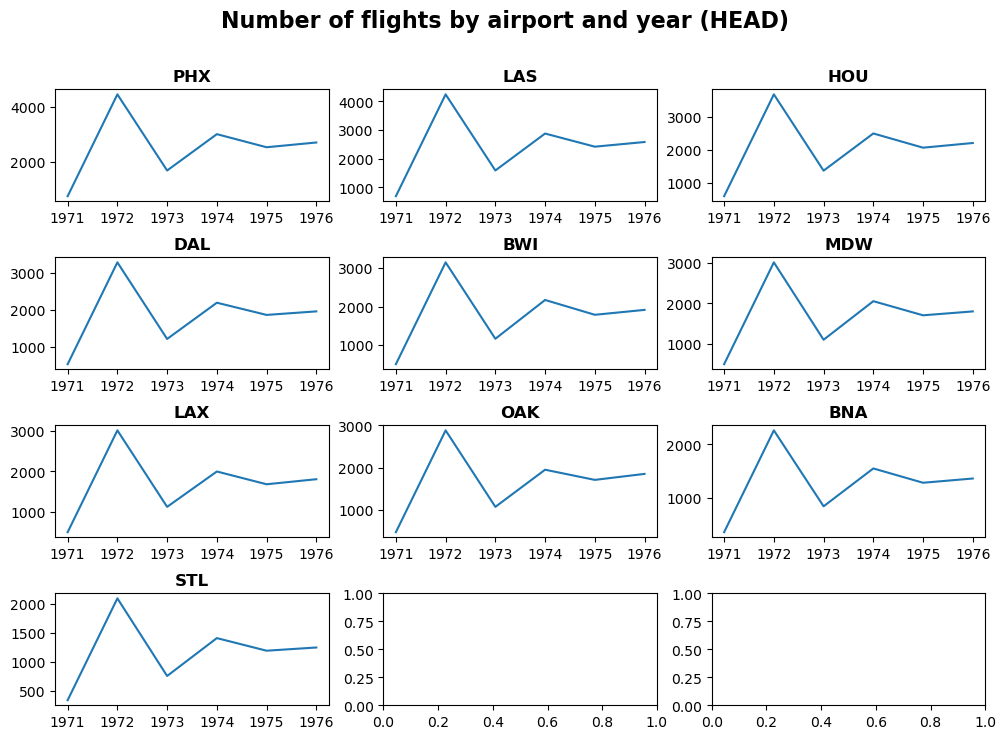

In [136]:
num_columns = 3
fig, ax = plt.subplots(nrows=int(n/num_columns+1), ncols=num_columns, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Number of flights by airport and year (HEAD)', fontsize=16, fontweight='bold')

for i, airport in enumerate(list_N_lagrest_airports):
    row = i // num_columns
    col = i % num_columns
    df_flights_by_airport_year.loc[airport]['num_flights'].sort_index().plot(ax=ax[row, col])
    ax[row, col].set_title(airport, loc='center', fontweight='bold')
    ax[row, col].set_xlabel(None)

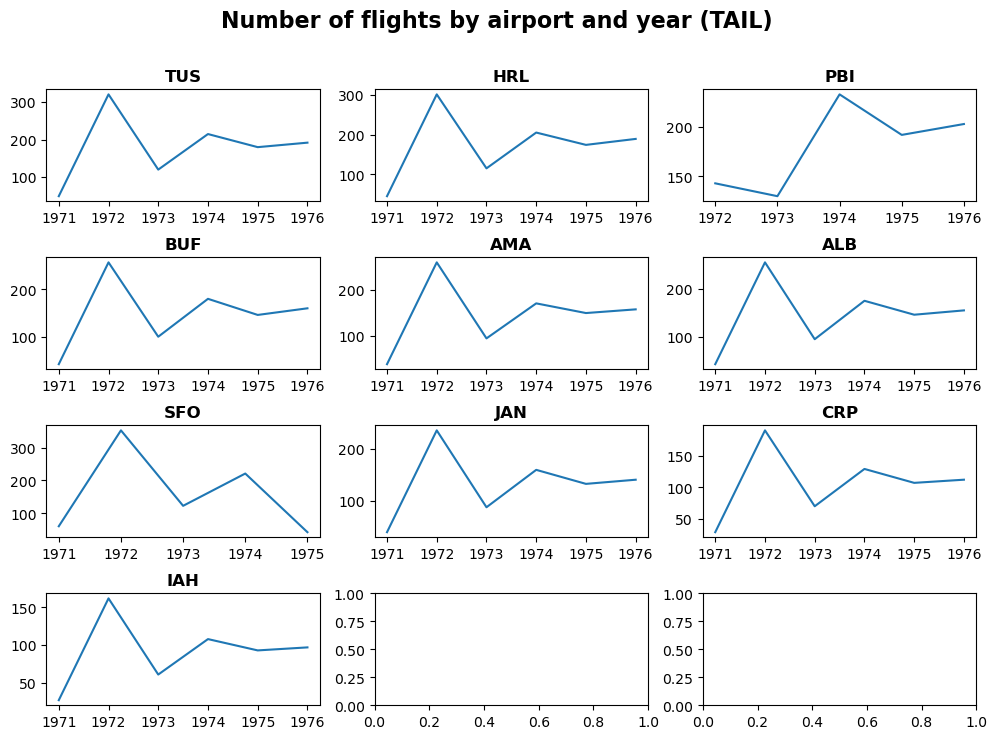

In [135]:
num_columns = 3
fig, ax = plt.subplots(nrows=int(n/num_columns+1), ncols=num_columns, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Number of flights by airport and year (TAIL)', fontsize=16, fontweight='bold')

for i, airport in enumerate(list_N_smallest_airports):
    row = i // num_columns
    col = i % num_columns
    (
        df_flights_by_airport_year.loc[airport]['num_flights']
        #SR: some of Years have 0 flights, so I replace them with NaN and drop them
            .replace(0, np.nan)
            .dropna()
            .sort_index()
        .plot(ax=ax[row, col])
    )
    ax[row, col].set_title(airport, loc='center', fontweight='bold')
    ax[row, col].set_xlabel(None)

😏🚩 As Data Analysis show, dataset was generated for each of the Years with same Airports / Destination distribution. \
After that, some custom distortions were applied to specific destinations. \
Presumably, we will have similar picture to the Origin

In [28]:
delete_variables("airport, col, row, df_flights, df_flights_by_airport_year, list_N_lagrest_airports, i, n, wiki_airports_us".replace(" ", "").split(","))

>>> Variable 'airport'....................... deleted from locals().
>>> Variable 'col'........................... deleted from locals().
>>> Variable 'row'........................... deleted from locals().
>>> Variable 'df_flights'.................... deleted from locals().
>>> Variable 'df_flights_by_airport_year'.... deleted from locals().
>>> Variable 'list_N_lagrest_airports'....... deleted from locals().
>>> Variable 'i'............................. deleted from locals().
>>> Variable 'n'............................. deleted from locals().
>>> Variable 'wiki_airports_us'.............. deleted from locals().


## 4️⃣ DA -- Delay by States / Airports / Years

## 5️⃣ DA -- Distance Traveled by States / Airports / Years

🚩 Tasks 4️⃣ and 5️⃣  are of the same type to Task 3️⃣, so no need to replicate this implementation (with little adjustments)